In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense


In [6]:
data=pd.read_csv('Car_Purchasing_Data.csv', encoding='latin1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [11]:
data.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

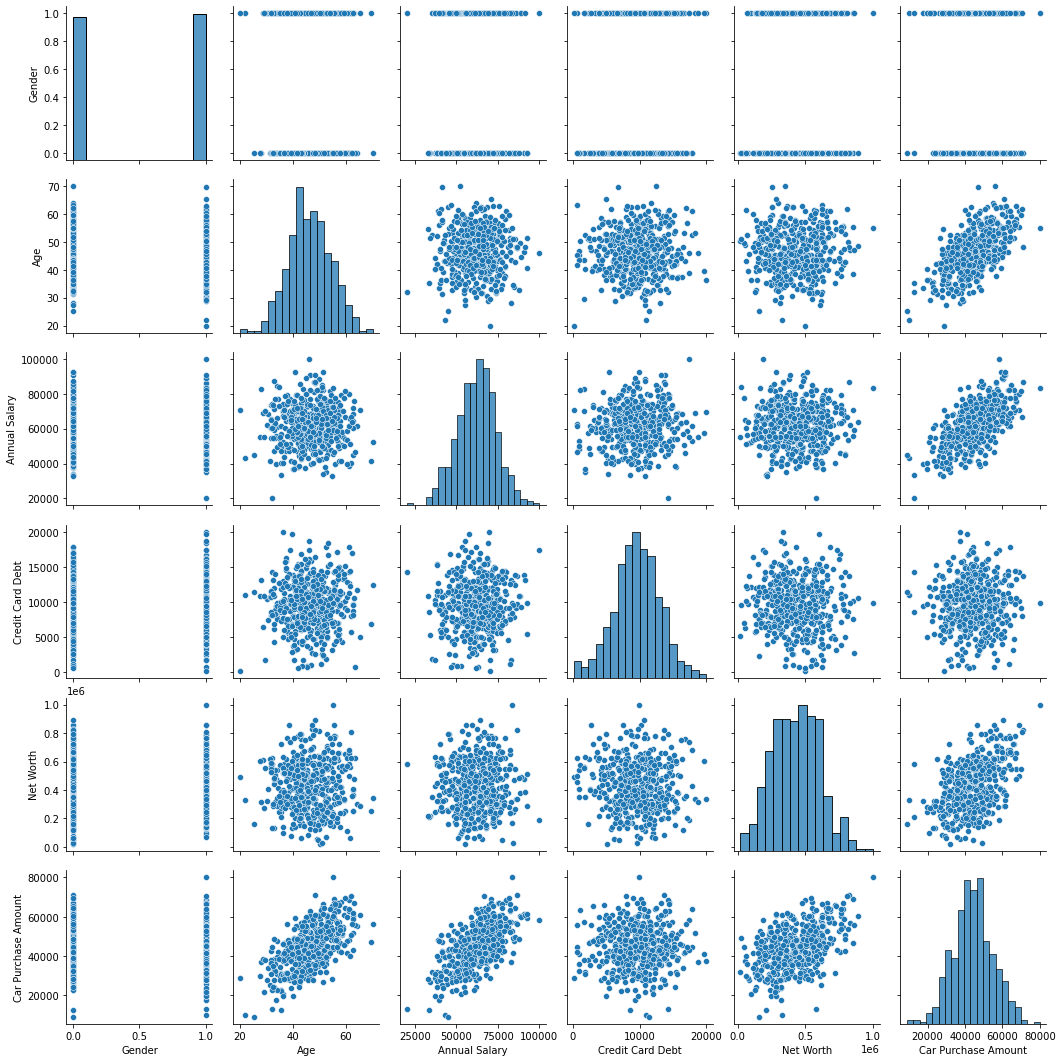

In [14]:
# Simple EDA
sns.pairplot(data) 

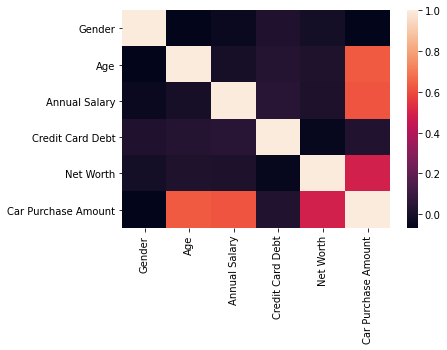

In [13]:
correlation=data.corr()  # Car purcahse ammount correlates with net worth, annual salary and Age.
sns.heatmap(correlation, annot=False)

In [16]:
# Drop the name, email and gender from the data
df=data.drop(columns=['Customer Name', 'Customer e-mail', 'Gender'], axis=1)
df.nunique()

Country                211
Age                    500
Annual Salary          500
Credit Card Debt       500
Net Worth              500
Car Purchase Amount    500
dtype: int64

In [18]:
df.drop('Country', axis=1, inplace=True)

In [19]:
df

,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


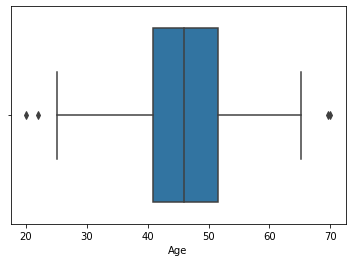

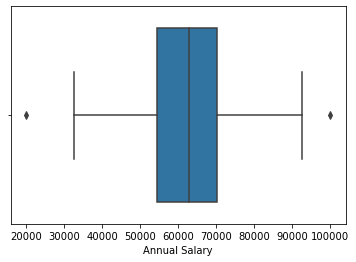

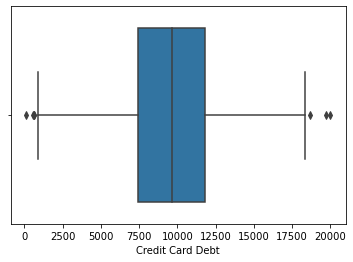

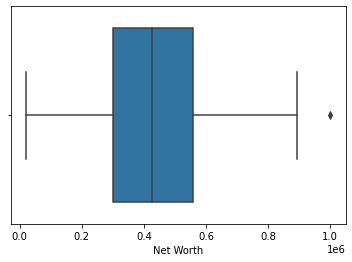

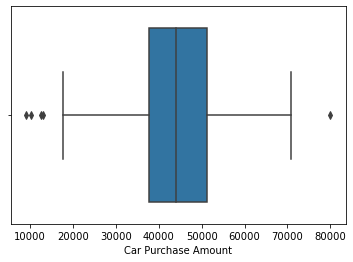

In [27]:
# check outliers
for col in df.columns:
    sns.boxplot(x=col, data=df)
    plt.show()

In [58]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
scaled_y=scaler.fit_transform(y.values.reshape(-1,1))

In [59]:
scaled_y[0:10]

array([[-0.82586972],
       [ 0.08415655],
       [-0.11931261],
       [ 2.15682037],
       [ 1.08764431],
       [ 1.15236364],
       [-1.42013803],
       [ 0.29967139],
       [ 0.35343556],
       [-0.55938203]])

In [60]:
X_train, X_test, y_train, y_test=train_test_split(scaled_X,scaled_y, test_size=0.25)

### Modeling training

In [69]:
model=Sequential()
model.add(Dense(100, input_dim=4, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 30,901
Trainable params: 30,901
Non-trainable params: 0
_________________________________________________________________


In [71]:
# compiling and training the model
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train, y_train, epochs=100, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 0s 28ms/step - loss: 0.7202 - val_loss: 0.4376
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1466 - val_loss: 0.0856
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0444 - val_loss: 0.0182
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0181 - val_loss: 0.0170
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0058
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0039 - val_loss: 0.0050
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 9/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 10/100
12/12 [==============================] - 0s 8ms/step - loss: 6.9788e-04 - val_loss: 0.0017
Epoc

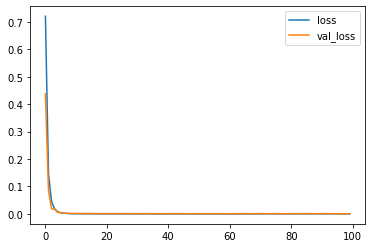

In [72]:
# evaluate the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [77]:
### summary: playing with the hyperparameters, the more nodes, the lower the loss and less epochs requred. 
y_pred=model.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred))

0.019820719680568852 0.9995988052918255 0.0003928609286556894


In [78]:
# Using linear regression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_lr=lr.predict(X_test)
print(mean_squared_error(y_test, y_lr, squared=False), r2_score(y_test, y_lr), mean_squared_error(y_test, y_lr))


0.0001386680948314375 0.9999999803632571 1.9228840524180547e-08
